In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
pd.set_option('display.max_columns', None) 

df = pd.read_csv('./incident_event_log.csv').head(5000)
print('size: ', df.shape)
df.head()

size:  (5000, 36)


number incident_state  active  reassignment_count  reopen_count  \
0  INC0000045            New    True                   0             0   
1  INC0000045       Resolved    True                   0             0   
2  INC0000045       Resolved    True                   0             0   
3  INC0000045         Closed   False                   0             0   
4  INC0000047            New    True                   0             0   

   sys_mod_count  made_sla    caller_id       opened_by        opened_at  \
0              0      True  Caller 2403    Opened by  8  29/2/2016 01:16   
1              2      True  Caller 2403    Opened by  8  29/2/2016 01:16   
2              3      True  Caller 2403    Opened by  8  29/2/2016 01:16   
3              4      True  Caller 2403    Opened by  8  29/2/2016 01:16   
4              0      True  Caller 2403  Opened by  397  29/2/2016 04:40   

   sys_created_by   sys_created_at  sys_updated_by   sys_updated_at  \
0    Created by 6  29/2/2016 01:23   Updated by 21  29/2/2016 01:23   
1    Created by 6  29/2/2016 01:23  Updated by 642  29/2/2016 08:53   
2    Created by 6  29/2/2016 01:23  Updated by 804  29/2/2016 11:29   
3    Created by 6  29/2/2016 01:23  Updated by 908   5/3/2016 12:00   
4  Created by 171  29/2/2016 04:57  Updated by 746  29/2/2016 04:57   

  contact_type      location     category      subcategory    u_symptom  \
0        Phone  Location 143  Category 55  Subcategory 170   Symptom 72   
1        Phone  Location 143  Category 55  Subcategory 170   Symptom 72   
2        Phone  Location 143  Category 55  Subcategory 170   Symptom 72   
3        Phone  Location 143  Category 55  Subcategory 170   Symptom 72   
4        Phone  Location 165  Category 40  Subcategory 215  Symptom 471   

  cmdb_ci      impact     urgency      priority assignment_group  assigned_to  \
0       ?  2 - Medium  2 - Medium  3 - Moderate         Group 56            ?   
1       ?  2 - Medium  2 - Medium  3 - Moderate         Group 56            ?   
2       ?  2 - Medium  2 - Medium  3 - Moderate         Group 56            ?   
3       ?  2 - Medium  2 - Medium  3 - Moderate         Group 56            ?   
4       ?  2 - Medium  2 - Medium  3 - Moderate         Group 70  Resolver 89   

   knowledge  u_priority_confirmation         notify problem_id rfc vendor  \
0       True                    False  Do Not Notify          ?   ?      ?   
1       True                    False  Do Not Notify          ?   ?      ?   
2       True                    False  Do Not Notify          ?   ?      ?   
3       True                    False  Do Not Notify          ?   ?      ?   
4       True                    False  Do Not Notify          ?   ?      ?   

  caused_by closed_code      resolved_by      resolved_at       closed_at  
0         ?      code 5  Resolved by 149  29/2/2016 11:29  5/3/2016 12:00  
1         ?      code 5  Resolved by 149  29/2/2016 11:29  5/3/2016 12:00  
2         ?      code 5  Resolved by 149  29/2/2016 11:29  5/3/2016 12:00  
3         ?      code 5  Resolved by 149  29/2/2016 11:29  5/3/2016 12:00  
4         ?      code 5   Resolved by 81   1/3/2016 09:52  6/3/2016 10:00

In [36]:
df.shape[0]

5000

In [37]:
df.columns

Index(['number', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'made_sla', 'caller_id', 'opened_by',
       'opened_at', 'sys_created_by', 'sys_created_at', 'sys_updated_by',
       'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory',
       'u_symptom', 'cmdb_ci', 'impact', 'urgency', 'priority',
       'assignment_group', 'assigned_to', 'knowledge',
       'u_priority_confirmation', 'notify', 'problem_id', 'rfc', 'vendor',
       'caused_by', 'closed_code', 'resolved_by', 'resolved_at', 'closed_at'],
      dtype='object')

In [38]:
df[['number','reassignment_count',
       'reopen_count','made_sla','opened_at','category',
       'subcategory','impact', 'urgency', 'priority', 'assignment_group',
        'knowledge','problem_id', 'rfc', 'vendor',
       'caused_by', 'resolved_at']].sample(10)

number  reassignment_count  reopen_count  made_sla       opened_at  \
3213  INC0000886                   2             0      True  1/3/2016 18:04   
3526  INC0000939                   0             0      True  1/3/2016 22:37   
4874  INC0001215                   0             0     False  2/3/2016 11:37   
2069  INC0000618                   0             0      True  1/3/2016 11:01   
3282  INC0000895                   1             0      True  1/3/2016 19:02   
2855  INC0000810                   1             0      True  1/3/2016 15:44   
3835  INC0001001                   1             0      True  2/3/2016 08:30   
2267  INC0000669                   5             0      True  1/3/2016 12:01   
2026  INC0000610                   2             0      True  1/3/2016 10:46   
4765  INC0001182                   1             0      True  2/3/2016 11:26   

         category      subcategory      impact     urgency      priority  \
3213  Category 53   Subcategory 13  2 - Medium  2 - Medium  3 - Moderate   
3526  Category 45   Subcategory 29     3 - Low     3 - Low       4 - Low   
4874  Category 44   Subcategory 54  2 - Medium  2 - Medium  3 - Moderate   
2069  Category 45  Subcategory 208  2 - Medium  2 - Medium  3 - Moderate   
3282  Category 44   Subcategory 54  2 - Medium  2 - Medium  3 - Moderate   
2855  Category 53  Subcategory 127  2 - Medium  2 - Medium  3 - Moderate   
3835  Category 23    Subcategory 3  2 - Medium  2 - Medium  3 - Moderate   
2267  Category 20  Subcategory 125  2 - Medium  2 - Medium  3 - Moderate   
2026  Category 53  Subcategory 194  2 - Medium  2 - Medium  3 - Moderate   
4765  Category 23    Subcategory 3  2 - Medium  2 - Medium  3 - Moderate   

     assignment_group  knowledge problem_id rfc vendor caused_by  \
3213         Group 27       True          ?   ?      ?         ?   
3526         Group 55       True          ?   ?      ?         ?   
4874         Group 12       True          ?   ?      ?         ?   
2069         Group 39       True          ?   ?      ?         ?   
3282         Group 55       True          ?   ?      ?         ?   
2855         Group 66       True          ?   ?      ?         ?   
3835         Group 25       True          ?   ?      ?         ?   
2267         Group 24       True          ?   ?      ?         ?   
2026         Group 66       True          ?   ?      ?         ?   
4765         Group 24       True          ?   ?      ?         ?   

          resolved_at  
3213   7/3/2016 08:59  
3526   2/3/2016 15:02  
4874   9/3/2016 13:26  
2069   1/3/2016 14:21  
3282   7/3/2016 14:59  
2855  11/3/2016 16:50  
3835   7/3/2016 12:11  
2267   4/3/2016 08:02  
2026   2/3/2016 11:13  
4765   2/3/2016 14:58

### check missing values

In [39]:
# df_closed.isnull().sum()

no null values

In [40]:
df["incident_state"].value_counts()

New                   1450
Active                1241
Resolved               766
Awaiting User Info     746
Closed                 738
Awaiting Problem        59
Name: incident_state, dtype: int64

In [41]:
# Create a horizontal bar plot
fig = px.bar(
    df["incident_state"].value_counts().reset_index(),
    x='incident_state',
    y='index',
    orientation='h',
    title='Incident State Counts',
    labels={'index': 'Incident State', 'incident_state': 'Count'}
)

# Show the plot
fig.show()

In [42]:
df["active"].value_counts()

True     4262
False     738
Name: active, dtype: int64

### only select not active

In [43]:
non_active = df[df['incident_state'] == 'Closed']

In [44]:
fig = px.bar(
    non_active["incident_state"].value_counts().reset_index(),
    x='incident_state',
    y='index',
    orientation='h',
    title='Incident State Counts',
    labels={'index': 'Incident State', 'incident_state': 'Count'}
)

# Show the plot
fig.show()

In [45]:
# convert to datetime

non_active.replace('?', pd.NA, inplace=True)  # Replace '?' with NaN
non_active['opened_at'] = pd.to_datetime(non_active['opened_at'], errors='coerce')
non_active['sys_created_at'] = pd.to_datetime(non_active['sys_created_at'], errors='coerce')
non_active['sys_updated_at'] = pd.to_datetime(non_active['sys_updated_at'], errors='coerce')
non_active['resolved_at'] = pd.to_datetime(non_active['resolved_at'], errors='coerce')
non_active['closed_at'] = pd.to_datetime(non_active['closed_at'], errors='coerce')


/var/folders/nf/xdcscmx50n3ccqpvd73zgys00000gn/T/ipykernel_30041/339216888.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/nf/xdcscmx50n3ccqpvd73zgys00000gn/T/ipykernel_30041/339216888.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/nf/xdcscmx50n3ccqpvd73zgys00000gn/T/ipykernel_30041/339216888.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [46]:

# Incident state distribution
incident_state_counts = non_active['incident_state'].value_counts()
print(incident_state_counts)

# Reassignment count distribution
reassignment_counts = non_active['reassignment_count'].value_counts()
print(reassignment_counts)

# Impact distribution
impact_counts = non_active['impact'].value_counts()
print(impact_counts)

# Urgency distribution
urgency_counts = non_active['urgency'].value_counts()
print(urgency_counts)

# Priority distribution
priority_counts = non_active['priority'].value_counts()
print(priority_counts)

# Time taken to resolve incidents
non_active['time_to_resolve'] = non_active['resolved_at'] - non_active['opened_at']
non_active["time_to_resolve_hours"] = non_active["time_to_resolve"].astype('timedelta64[s]') / 3600
non_active["time_to_resolve_hours"] = non_active["time_to_resolve"].astype('timedelta64[s]') / 3600
non_active.loc[non_active["time_to_resolve_hours"] < 0, "time_to_resolve_hours"] = 0

average_resolve_time = non_active['time_to_resolve'].mean()
print(f"Average time to resolve incidents: {average_resolve_time}")


Closed    738
Name: incident_state, dtype: int64
0     395
1     183
2      76
3      32
4      12
5      11
6       9
7       6
10      5
8       4
9       2
18      1
14      1
12      1
Name: reassignment_count, dtype: int64
2 - Medium    649
3 - Low        60
1 - High       29
Name: impact, dtype: int64
2 - Medium    649
3 - Low        60
1 - High       29
Name: urgency, dtype: int64
3 - Moderate    623
4 - Low          71
2 - High         31
1 - Critical     13
Name: priority, dtype: int64
Average time to resolve incidents: 61 days 02:54:12.923076923


/var/folders/nf/xdcscmx50n3ccqpvd73zgys00000gn/T/ipykernel_30041/2854352394.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/nf/xdcscmx50n3ccqpvd73zgys00000gn/T/ipykernel_30041/2854352394.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/nf/xdcscmx50n3ccqpvd73zgys00000gn/T/ipykernel_30041/2854352394.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [47]:
non_active.sample(4)

number incident_state  active  reassignment_count  reopen_count  \
4498  INC0001127         Closed   False                   1             0   
4929  INC0001225         Closed   False                   0             0   
2522  INC0000738         Closed   False                   0             0   
4605  INC0001149         Closed   False                   0             0   

      sys_mod_count  made_sla    caller_id       opened_by  \
4498             24     False  Caller 4330  Opened by  468   
4929              4      True  Caller 3597            <NA>   
2522              2      True  Caller 4414  Opened by  433   
4605             25     False  Caller 5281  Opened by  267   

               opened_at  sys_created_by      sys_created_at  sys_updated_by  \
4498 2016-02-03 10:39:00  Created by 188 2016-02-03 10:42:00  Updated by 908   
4929 2016-02-03 11:45:00   Created by 89 2016-02-03 11:51:00  Updated by 908   
2522 2016-01-03 13:37:00  Created by 190 2016-01-03 13:40:00  Updated by 908   
4605 2016-02-03 11:03:00  Created by 113 2016-02-03 11:05:00  Updated by 908   

          sys_updated_at contact_type      location     category  \
4498 2016-01-05 15:07:00        Phone   Location 41  Category 44   
4929 2016-09-03 13:00:00        Phone  Location 204  Category 37   
2522 2016-06-03 15:00:00        Phone   Location 51  Category 45   
4605 2016-05-16 17:07:00        Phone  Location 161  Category 45   

          subcategory    u_symptom cmdb_ci      impact     urgency  \
4498   Subcategory 57         <NA>    <NA>  2 - Medium  2 - Medium   
4929  Subcategory 123  Symptom 118    <NA>  2 - Medium  2 - Medium   
2522  Subcategory 200         <NA>    <NA>  2 - Medium  2 - Medium   
4605  Subcategory 150         <NA>    <NA>  2 - Medium  2 - Medium   

          priority assignment_group   assigned_to  knowledge  \
4498  3 - Moderate          Group 5  Resolver 237       True   
4929  3 - Moderate         Group 46   Resolver 83       True   
2522  3 - Moderate         Group 39          <NA>       True   
4605  3 - Moderate         Group 10  Resolver 139       True   

      u_priority_confirmation         notify problem_id   rfc vendor  \
4498                     True  Do Not Notify       <NA>  <NA>   <NA>   
4929                    False  Do Not Notify       <NA>  <NA>   <NA>   
2522                    False  Do Not Notify       <NA>  <NA>   <NA>   
4605                     True  Do Not Notify       <NA>  <NA>   <NA>   

     caused_by closed_code      resolved_by         resolved_at  \
4498      <NA>      code 6  Resolved by 216 2016-04-26 14:50:00   
4929      <NA>      code 6   Resolved by 76 2016-04-03 12:03:00   
2522      <NA>      code 6  Resolved by 166 2016-01-03 14:49:00   
4605      <NA>      code 6  Resolved by 125 2016-11-05 16:10:00   

               closed_at   time_to_resolve  time_to_resolve_hours  
4498 2016-01-05 15:07:00  83 days 04:11:00            1996.183333  
4929 2016-09-03 13:00:00  60 days 00:18:00            1440.300000  
2522 2016-06-03 15:00:00   0 days 01:12:00               1.200000  
4605 2016-05-16 17:07:00 276 days 05:07:00            6629.116667

Which kind of incidents are getting reopened?

## time to resolve in hrs plot

In [48]:
reopened_df = non_active[non_active["reopen_count"] > 0]
print(reopened_df.shape)

(9, 38)


In [49]:

fig = px.histogram(non_active, x='time_to_resolve_hours', nbins=500, title='Time to Resolve Distribution')

# Show the plot
fig.show()


## github code

Here is the distribution of different state of incidents in the data

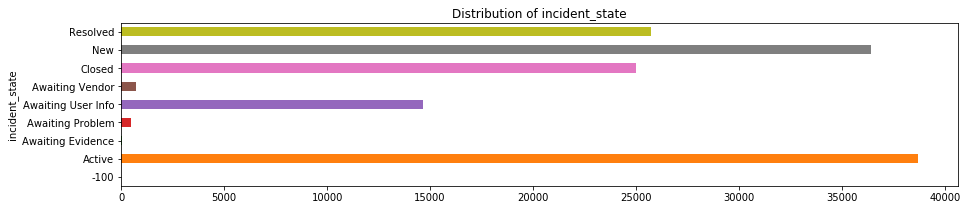

Active                38716
New                   36407
Resolved              25751
Closed                24985
Awaiting User Info    14642
Awaiting Vendor         707
Awaiting Problem        461
Awaiting Evidence        38
-100                      5
Name: incident_state, dtype: int64

In [177]:
df.groupby('incident_state') \
    .count()['number'] \
    .plot(kind='barh',
          title='Distribution of incident_state',
          figsize=(15, 3))
plt.show()
df['incident_state'].value_counts()

Filtering out only closed incidents for our analysis as the incident can be in other state for multiple time and closed will be the final state which will give us the unique incident.

In [178]:
df_closed = df["incident_state"] == "Closed"
df_closed = df[df_closed]

Let us see the data types of each variable, only three variables are numeric rest are charatcer and bool.

In [179]:
df_closed.dtypes 

number                     object
incident_state             object
active                       bool
reassignment_count          int64
reopen_count                int64
sys_mod_count               int64
made_sla                     bool
caller_id                  object
opened_by                  object
opened_at                  object
sys_created_by             object
sys_created_at             object
sys_updated_by             object
sys_updated_at             object
contact_type               object
location                   object
category                   object
subcategory                object
u_symptom                  object
cmdb_ci                    object
impact                     object
urgency                    object
priority                   object
assignment_group           object
assigned_to                object
knowledge                    bool
u_priority_confirmation      bool
notify                     object
problem_id                 object
rfc           

Let us see the stats of numeric variables

In [180]:
df_closed.describe()

reassignment_count  reopen_count  sys_mod_count
count        24985.000000  24985.000000   24985.000000
mean             0.941765      0.013368       6.694417
std              1.573962      0.149116       8.548757
min              0.000000      0.000000       1.000000
25%              0.000000      0.000000       2.000000
50%              0.000000      0.000000       4.000000
75%              1.000000      0.000000       8.000000
max             27.000000      8.000000     129.000000

## Question 1 - What types of incidents are getting reopened?

Incidents are reassigned and reopend sometimes, maximum reassigment is 27 whereas there are incidents which are reopened 8 times.Let us first see that with what close codes incidents are getting closed

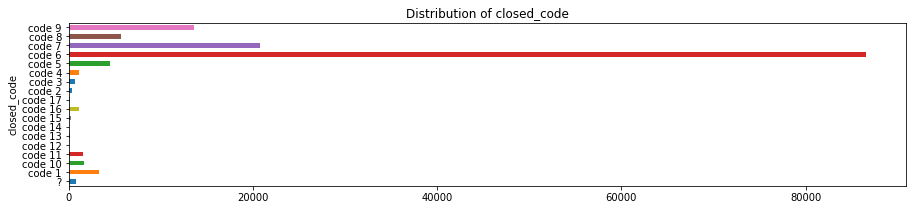

code 6     86583
code 7     20733
code 9     13562
code 8      5646
code 5      4469
code 1      3265
code 10     1678
code 11     1493
code 4      1139
code 16     1091
?            714
code 3       608
code 2       349
code 15      183
code 17      115
code 13       59
code 12       13
code 14       12
Name: closed_code, dtype: int64

In [181]:
df.groupby('closed_code') \
    .count()['number'] \
    .plot(kind='barh',
          title='Distribution of closed_code',
          figsize=(15, 3))
plt.show()
df['closed_code'].value_counts()

Close code 6,7,8,9 are the major ones with which the incidents are getting closed.Now let us check if that happens for the ones which are getting reopened or it is different?

In [182]:
df_closed_reo = df_closed["reopen_count"] > 0
df_closed_reo = df_closed[df_closed_reo]

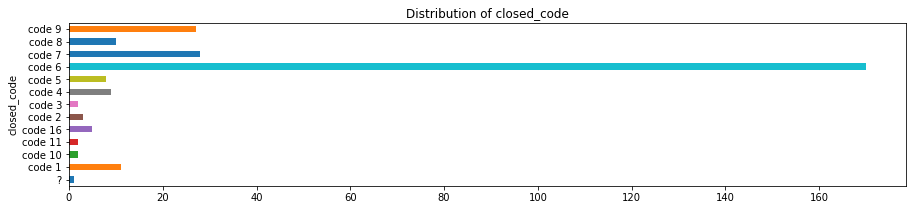

code 6     170
code 7      28
code 9      27
code 1      11
code 8      10
code 4       9
code 5       8
code 16      5
code 2       3
code 11      2
code 10      2
code 3       2
?            1
Name: closed_code, dtype: int64

In [183]:
df_closed_reo.groupby('closed_code') \
    .count()['number'] \
    .plot(kind='barh',
          title='Distribution of closed_code',
          figsize=(15, 3))
plt.show()
df_closed_reo['closed_code'].value_counts()

We can see the close code are similar for reopened tickets but we see that there are other close codes too which are ending as reason to close the reopened tickets. Let us now see if these reopened has any pattern with SLA.

In [184]:
df_closed['made_sla'].value_counts()

True     15831
False     9154
Name: made_sla, dtype: int64

In [185]:
df_closed_reo['made_sla'].value_counts()

False    210
True      68
Name: made_sla, dtype: int64

We can see here that SLAs are missed in most of the reopened incidents so if the tickets are getting reopened then there is high chance that SLAs will be missed.

Let us now examine if there are different symptoms for reopened incidents.

In [186]:
df_closed['u_symptom'].value_counts()

Symptom 491    9272
?              5856
Symptom 534    1670
Symptom 116     485
Symptom 387     426
Symptom 4       375
Symptom 506     355
Symptom 532     353
Symptom 571     282
Symptom 296     207
Symptom 105     200
Symptom 118     195
Symptom 208     173
Symptom 470     165
Symptom 10      158
Symptom 295     154
Symptom 120     150
Symptom 517     142
Symptom 102     141
Symptom 127     136
Symptom 54      135
Symptom 87      129
Symptom 458     125
Symptom 494     123
Symptom 6        94
Symptom 70       93
Symptom 117      87
Symptom 592      86
Symptom 65       85
Symptom 119      84
               ... 
Symptom 362       1
Symptom 207       1
Symptom 309       1
Symptom 545       1
Symptom 330       1
Symptom 210       1
Symptom 179       1
Symptom 29        1
Symptom 400       1
Symptom 450       1
Symptom 275       1
Symptom 314       1
Symptom 73        1
Symptom 204       1
Symptom 327       1
Symptom 496       1
Symptom 555       1
Symptom 542       1
Symptom 12        1


In [187]:
df_closed_reo['u_symptom'].value_counts()

Symptom 491    104
?               58
Symptom 532     12
Symptom 534      9
Symptom 4        7
Symptom 296      5
Symptom 458      5
Symptom 208      4
Symptom 10       4
Symptom 465      4
Symptom 114      4
Symptom 387      3
Symptom 116      3
Symptom 119      3
Symptom 9        3
Symptom 134      2
Symptom 315      2
Symptom 120      2
Symptom 117      2
Symptom 87       2
Symptom 455      2
Symptom 494      2
Symptom 6        2
Symptom 65       2
Symptom 54       2
Symptom 596      1
Symptom 463      1
Symptom 118      1
Symptom 127      1
Symptom 474      1
Symptom 592      1
Symptom 544      1
Symptom 8        1
Symptom 410      1
Symptom 218      1
Symptom 381      1
Symptom 517      1
Symptom 256      1
Symptom 273      1
Symptom 462      1
Symptom 506      1
Symptom 548      1
Symptom 531      1
Symptom 486      1
Symptom 70       1
Symptom 471      1
Symptom 217      1
Symptom 102      1
Symptom 198      1
Symptom 358      1
Symptom 257      1
Symptom 371      1
Symptom 105 

Symptoms are also very similar to other incidents as for reopened so there is no clear pattern with close code and symptoms but we can see that incase of reopened incidents the SLAs get missed.

## Question 2 - What kind of incidents are missing the SLAs?

Now as we see that reopened incidents are missing SLAs so now let us exmaine distribution of incidents which are missing SLAs

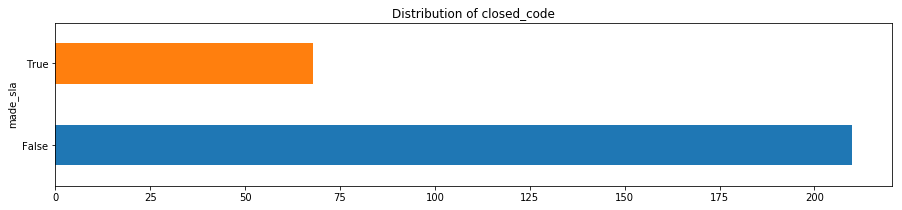

True     15831
False     9154
Name: made_sla, dtype: int64

In [188]:
df_closed_reo.groupby('made_sla') \
    .count()['number'] \
    .plot(kind='barh',
          title='Distribution of closed_code',
          figsize=(15, 3))
plt.show()
df_closed['made_sla'].value_counts()

Around 37% incidents are missing SLAs so now let us see what kind of incidents usually miss SLAs

In [189]:
df_closed_sla = df_closed["made_sla"] == 1
df_closed_sla = df_closed[df_closed_sla]

In [190]:
pd.crosstab(df_closed['made_sla'],df_closed['priority'])

priority  1 - Critical  2 - High  3 - Moderate  4 - Low
made_sla                                               
False              265       406          8358      125
True                 6         2         15171      652

There is very clear pattern that if SLAs mostly get missed for critical and high priortiy incidents whereas SLAs are met for Moderate and Low priortiy incidents.

## Question 3 - What features are important to predict the close code?

Based on the given incident data, let us see which features can help us to predict the close code so that incidents can be assigned to relevant team based on the predicted close code. First let us filter out the relevant features

In [191]:
df_closed_1 = df_closed.loc[:,['reassignment_count','reopen_count','sys_mod_count','made_sla','location','category','subcategory','u_symptom','priority','vendor']]

As we have only categorical variables s0 for each of the categorical variables, we now need to create dummy columns.

In [192]:
df_closed_dummy = pd.get_dummies(df_closed_1)

In [193]:
df_closed_dummy.head()

reassignment_count  reopen_count  sys_mod_count  made_sla  location_?  \
3                    0             0              4      True           0   
12                   1             0              8      True           0   
19                   0             0              6      True           0   
23                   0             0              3      True           0   
31                   1             0              7     False           0   

    location_Location 10  location_Location 100  location_Location 101  \
3                      0                      0                      0   
12                     0                      0                      0   
19                     0                      0                      0   
23                     0                      0                      0   
31                     0                      0                      0   

    location_Location 102  location_Location 105       ...        \
3                       0                      0       ...         
12                      0                      0       ...         
19                      0                      0       ...         
23                      0                      0       ...         
31                      0                      0       ...         

    u_symptom_Symptom 96  u_symptom_Symptom 97  u_symptom_Symptom 99  \
3                      0                     0                     0   
12                     0                     0                     0   
19                     0                     0                     0   
23                     0                     0                     0   
31                     0                     0                     0   

    priority_1 - Critical  priority_2 - High  priority_3 - Moderate  \
3                       0                  0                      1   
12                      0                  0                      1   
19                      0                  0                      1   
23                      0                  0                      1   
31                      0                  1                      0   

    priority_4 - Low  vendor_?  vendor_Vendor 1  vendor_code 8s  
3                  0         1                0               0  
12                 0         1                0               0  
19                 0         1                0               0  
23                 0         1                0               0  
31                 0         1                0               0  

[5 rows x 934 columns]

In [194]:
df_closed_dummy['closed_code']= df_closed['closed_code']

Let us Split into explanatory and response variables

In [195]:
Y = df_closed_dummy['closed_code']
X = df_closed_dummy.drop(columns=['closed_code'])

In [196]:
X.head()

reassignment_count  reopen_count  sys_mod_count  made_sla  location_?  \
3                    0             0              4      True           0   
12                   1             0              8      True           0   
19                   0             0              6      True           0   
23                   0             0              3      True           0   
31                   1             0              7     False           0   

    location_Location 10  location_Location 100  location_Location 101  \
3                      0                      0                      0   
12                     0                      0                      0   
19                     0                      0                      0   
23                     0                      0                      0   
31                     0                      0                      0   

    location_Location 102  location_Location 105       ...        \
3                       0                      0       ...         
12                      0                      0       ...         
19                      0                      0       ...         
23                      0                      0       ...         
31                      0                      0       ...         

    u_symptom_Symptom 96  u_symptom_Symptom 97  u_symptom_Symptom 99  \
3                      0                     0                     0   
12                     0                     0                     0   
19                     0                     0                     0   
23                     0                     0                     0   
31                     0                     0                     0   

    priority_1 - Critical  priority_2 - High  priority_3 - Moderate  \
3                       0                  0                      1   
12                      0                  0                      1   
19                      0                  0                      1   
23                      0                  0                      1   
31                      0                  1                      0   

    priority_4 - Low  vendor_?  vendor_Vendor 1  vendor_code 8s  
3                  0         1                0               0  
12                 0         1                0               0  
19                 0         1                0               0  
23                 0         1                0               0  
31                 0         1                0               0  

[5 rows x 934 columns]

We will fit random forest model to check which features are coming as important for predicting the close code.

In [197]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200
                               ,random_state=100)

model.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

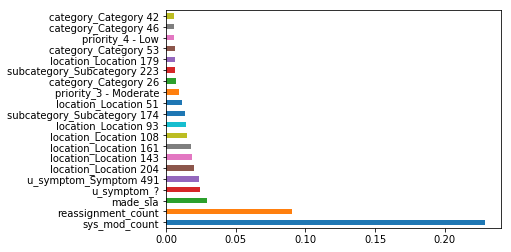

In [198]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

Most important feature that will help us in our prediction is sys_mod_count that is number of incident updates until that moment which makes sense as based on the system updates there will some pattern that what would be best resolution for the given incidents. Next features in reassignment count and if the incident has met SLA or not, symptom and location also coming as important features.